In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [47]:
#Load data
train = pd.read_csv('train.csv')
y = train['SalePrice']
train.drop(['Id','SalePrice'],axis = 1,inplace = True)
test = pd.read_csv('test.csv')

In [48]:
#check where are Nan Values
def nan_cols(df):
    columns_nan = df.isna().sum()
    nan_val = columns_nan.where(columns_nan > 0).dropna()
    return list(nan_val.index)
nan_cols = nan_cols(train)

In [49]:
## INITIAL EDA
#Separate categorical and non categorical data and get where are the nan values in each one
def separate_data(df):
    categorical = [num for num in df.columns if df.dtypes[num] == 'object']
    numerical = [num for num in df.columns if df.dtypes[num] != 'object']
    
    nan_categorical = [cat for cat in nan_cols if df.dtypes[cat] == 'object']
    nan_numerical = [na for na in nan_cols if df.dtypes[na] != 'object']
    return categorical,numerical, nan_numerical,nan_categorical
categorical, numerical, nan_numerical,nan_categorical = separate_data(train)

In [51]:
##Plot histogram, boxplot and scatter plot(column and house price)
def numerical_plot(df,numerical):
    for col in numerical:
        plt.figure(figsize = (15,4))
        plt.subplot(131)
        sns.histplot(df[col])
        plt.subplot(132)
        sns.boxplot(x = df[col])
        plt.subplot(133)
        sns.scatterplot(x=df[col],y = y)
        plt.title(col)
        plt.show() 
#numerical_plot(train,numerical)

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

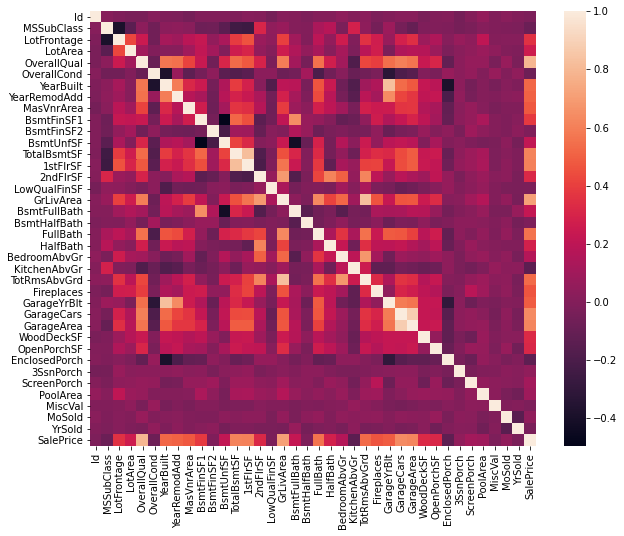

In [44]:
corr_matrix = train.corr()
corr_matrix['SalePrice'].sort_values()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix)
corr_matrix['SalePrice'].sort_values()


In [46]:
def categorical_plot(df,categorical):   
    for col in categorical:
        data = df[col].value_counts()
        for na in nan_categorical:
            if col == na:
                no_val=df[na].isna().value_counts().rename({True: 'Na value', False : '0'})                
                data = data.append(no_val)
                data = data.drop('0')
        data.plot.bar()
        plt.title(col)
        plt.show()
#categorical_plot(train,categorical)